<a href="https://colab.research.google.com/github/DeepaliSaini4/Machine-Learning/blob/main/%20HierarchicalClustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset shape: (200, 5)
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


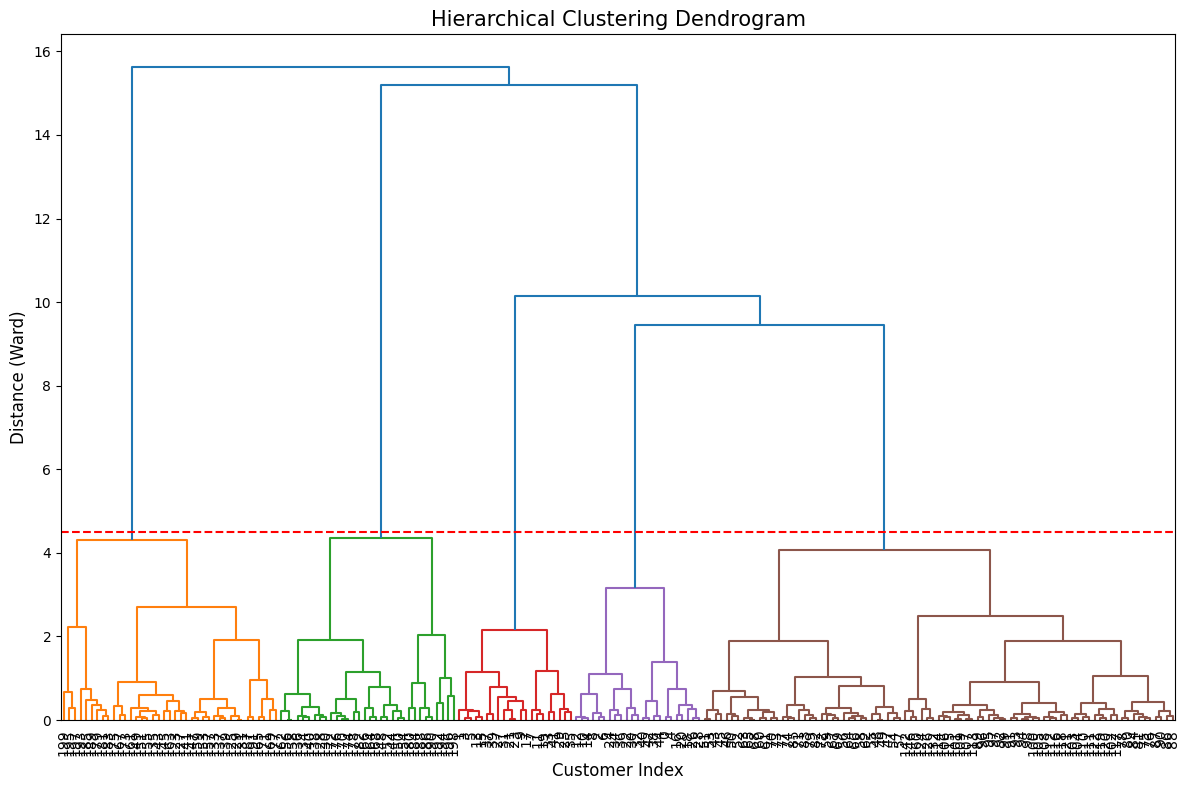

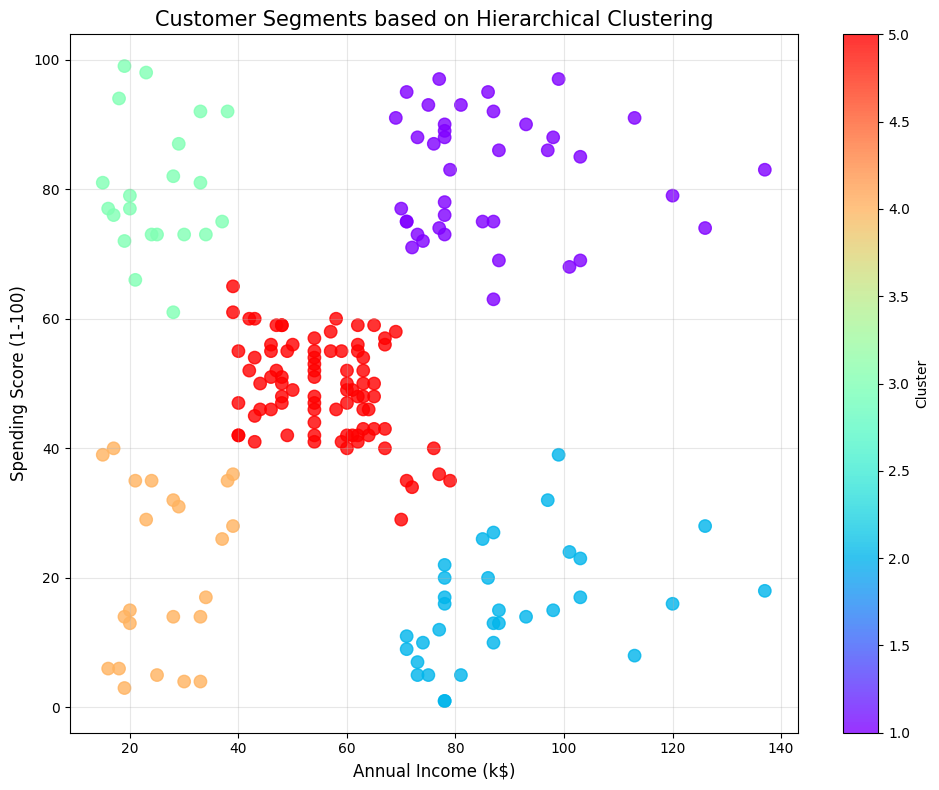


Cluster Profiles:
           Age         Annual Income (k$)          Spending Score (1-100)      \
          mean min max               mean min  max                   mean min   
Cluster                                                                         
1        32.69  27  40              86.54  69  137                  82.13  63   
2        41.00  19  59              89.41  71  137                  15.59   1   
3        25.33  18  35              25.10  15   38                  80.05  61   
4        45.22  19  67              26.30  15   39                  20.91   3   
5        42.48  18  70              55.81  39   79                  49.13  29   

                                 Gender  
        max                    <lambda>  
Cluster                                  
1        97  {'Female': 21, 'Male': 18}  
2        39  {'Male': 18, 'Female': 14}  
3        99   {'Female': 12, 'Male': 9}  
4        40   {'Female': 14, 'Male': 9}  
5        65  {'Female': 51, 'Male': 34

In [15]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv('Mall_Customers.csv')
print("Dataset shape:", df.shape)
print(df.head())

# Select features for clustering
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Compute the linkage matrix using Ward's method
Z = linkage(X_scaled, method='ward')

# Plot the dendrogram
plt.figure(figsize=(12, 8))
plt.title('Hierarchical Clustering Dendrogram', fontsize=15)
plt.xlabel('Customer Index', fontsize=12)
plt.ylabel('Distance (Ward)', fontsize=12)
dendrogram(
    Z,
    leaf_rotation=90.,  # Rotates the x-axis labels
    leaf_font_size=10.,  # Font size for the x-axis labels
    color_threshold=4.5  # Color threshold for distinguishing clusters
)
plt.axhline(y=4.5, color='r', linestyle='--')  # Draw a horizontal line at cut threshold
plt.tight_layout()
plt.show()

# Extract clusters using the distance threshold
from scipy.cluster.hierarchy import fcluster
clusters = fcluster(Z, t=4.5, criterion='distance')

# Add cluster labels to the original dataframe
df['Cluster'] = clusters

# Visualize clusters in a scatter plot
plt.figure(figsize=(10, 8))
scatter = plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'],
                     c=df['Cluster'], cmap='rainbow', s=80, alpha=0.8)
plt.xlabel('Annual Income (k$)', fontsize=12)
plt.ylabel('Spending Score (1-100)', fontsize=12)
plt.title('Customer Segments based on Hierarchical Clustering', fontsize=15)
plt.colorbar(scatter, label='Cluster')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Analyze cluster characteristics
print("\nCluster Profiles:")
cluster_stats = df.groupby('Cluster').agg({
    'Age': ['mean', 'min', 'max'],
    'Annual Income (k$)': ['mean', 'min', 'max'],
    'Spending Score (1-100)': ['mean', 'min', 'max'],
    'Gender': lambda x: x.value_counts().to_dict()
}).round(2)
print(cluster_stats)



